{('Q83319', 'Q2840'): Text(-0.18801312033047068, -0.23392658118702717, 'Q86'),
 ('Q2840', 'Q83319'): Text(-0.18801312033047068, -0.23392658118702717, 'Q86'),
 ('Q2840', 'Q103177'): Text(-0.08087333602970473, 0.29295601829356993, 'Q86'),
 ('Q2840', 'Q114085'): Text(-0.1499598111287604, 0.11373420807295143, 'Q86'),
 ('Q2840', 'Q125367'): Text(-0.2801915677358642, -0.05968651743832991, 'Q86'),
 ('Q2840', 'Q133780'): Text(0.07378571608551725, 0.20586417951243513, 'Q86'),
 ('Q2840', 'Q133823'): Text(-0.2486733904692227, -0.16096389449268517, 'Q86'),
 ('Q2840', 'Q153861'): Text(0.2660526304528037, 0.16631813200142795, 'Q86'),
 ('Q2840', 'Q154874'): Text(-0.11184592637519326, -0.28909834994760497, 'Q86'),
 ('Q2840', 'Q154882'): Text(-0.04525526511256274, 0.14619740397258404, 'Q86'),
 ('Q2840', 'Q155098'): Text(-0.15358752626621003, 0.22670524169446898, 'Q86'),
 ('Q2840', 'Q164727'): Text(0.25725307528962954, -0.1163855935610361, 'Q86'),
 ('Q2840', 'Q164818'): Text(0.15323182009914554, -0.2373

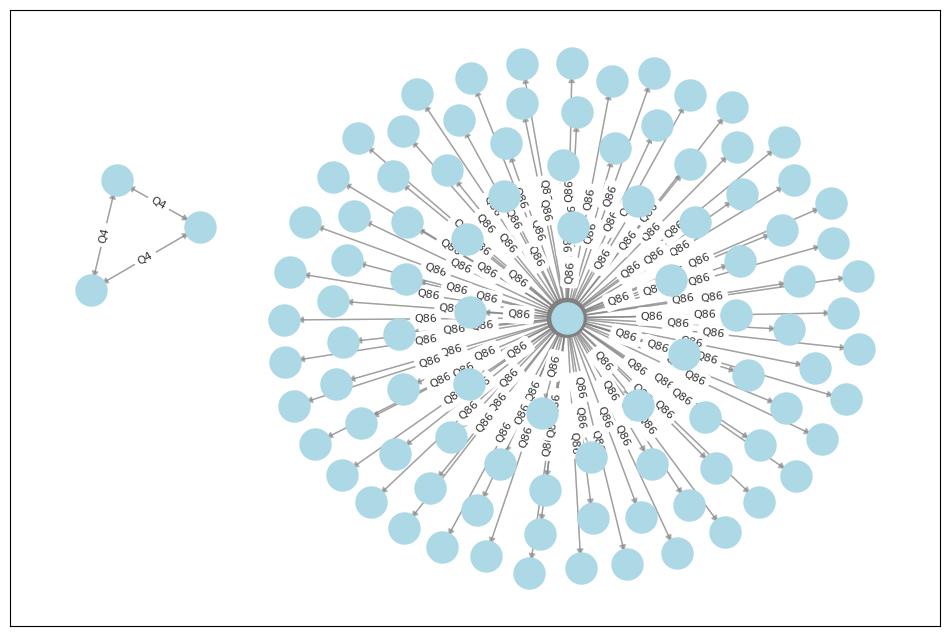

In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
import matplotlib.pyplot as plt

# Define the G variable at the beginning of your code
G = nx.DiGraph()

# SPARQL-Abfrage, um die Beziehungen zwischen den Krankheiten zu erhalten
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
query = """
SELECT DISTINCT ?disease1 ?disease2 ?symptom
WHERE {
  ?disease1 wdt:P780 ?symptom .
  ?disease2 wdt:P780 ?symptom .
  FILTER (?disease1 != ?disease2)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 100
"""
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

disease_symptom_dict = {}

# Speichern Sie die Ergebnisse der SPARQL-Abfrage in einem Dictionary
for result in results["results"]["bindings"]:
    disease1 = result["disease1"]["value"].split("/")[-1]
    disease2 = result["disease2"]["value"].split("/")[-1]
    symptom = result["symptom"]["value"].split("/")[-1]
    if disease1 not in disease_symptom_dict:
        disease_symptom_dict[disease1] = []
    if disease2 not in disease_symptom_dict:
        disease_symptom_dict[disease2] = []
    disease_symptom_dict[disease1].append((disease2, symptom))
    disease_symptom_dict[disease2].append((disease1, symptom))

# Fügen Sie jeden Knoten (Krankheit) zum Graphen hinzu
for disease in disease_symptom_dict:
    G.add_node(disease)

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Graphen hinzu
for disease1 in disease_symptom_dict:
    for disease2, symptom in disease_symptom_dict[disease1]:
        G.add_edge(disease1, disease2, symptom=symptom)

# Zeichnen Sie den Graphen
pos = nx.spring_layout(G, k=0.5, iterations=50)
fig, ax = plt.subplots(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)
edge_labels = {(u, v): d["symptom"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, alpha=0.8)

{('Q892776', 'Q885574'): 'cerebrofacial arteriovenous metameric syndrome, palpebral tumor with a vascular malformation, rare genetic epilepsy, genetic skin vascular disorder, arteriovenous malformation, vascular skin disease, skin hemangioma, rare genetic vascular tumor, benign eyelid neoplasm', ('Q877827', 'Q916398'): 'type 2 diabetes, ketoacidosis, metabolic acidosis, particular disease, complications of diabetes mellitus', ('Q877827', 'Q874586'): 'type 2 diabetes, ketoacidosis, metabolic acidosis, particular disease, complications of diabetes mellitus', ('Q877827', 'Q890200'): 'type 2 diabetes, ketoacidosis, metabolic acidosis, particular disease, complications of diabetes mellitus', ('Q877827', 'Q870891'): 'type 2 diabetes, ketoacidosis, metabolic acidosis, particular disease, complications of diabetes mellitus', ('Q877827', 'Q917447'): 'type 2 diabetes, ketoacidosis, metabolic acidosis, particular disease, complications of diabetes mellitus', ('Q877827', 'Q923020'): 'type 2 diabet

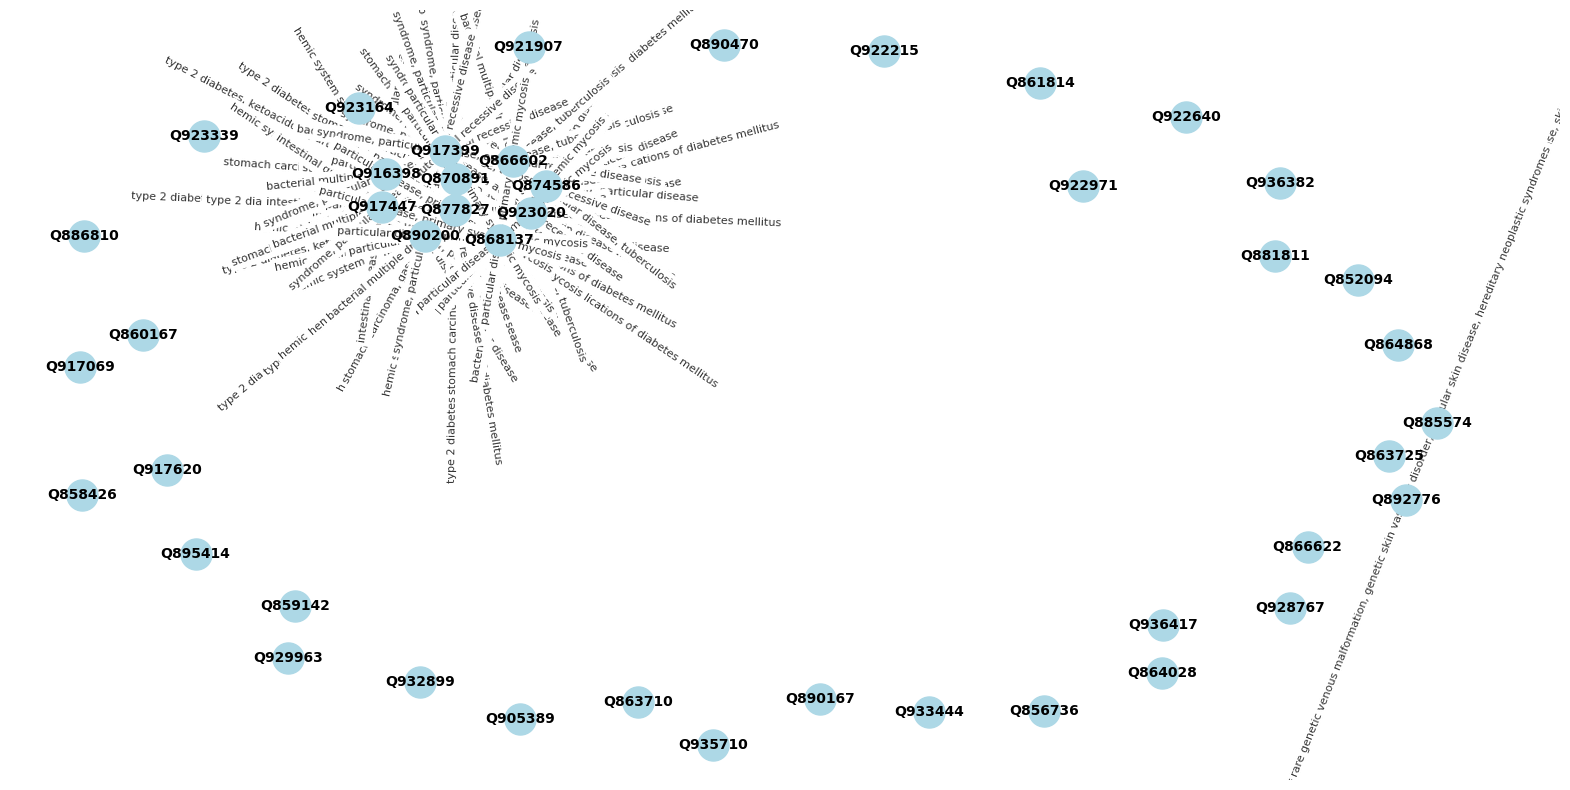

In [11]:
from SPARQLWrapper import SPARQLWrapper, JSON
import networkx as nx
import matplotlib.pyplot as plt

# SPARQL-Abfrage, um die Beziehungen zwischen den Krankheiten zu erhalten
sparql = SPARQLWrapper("https://query.wikidata.org/sparql")
query = """
SELECT DISTINCT ?disease ?diseaseLabel ?subclass ?subclassLabel
WHERE {
  ?disease wdt:P31 wd:Q12136 .
  ?disease wdt:P279 ?subclass .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
LIMIT 100
"""
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

disease_dict = {}

# Speichern Sie die Ergebnisse der SPARQL-Abfrage in einem Dictionary
for result in results["results"]["bindings"]:
    disease = result["disease"]["value"].split("/")[-1]
    subclass = result["subclass"]["value"].split("/")[-1]
    subclass_label = result["subclassLabel"]["value"]
    if disease not in disease_dict:
        disease_dict[disease] = {'subclasses': set(), 'labels': []}
    disease_dict[disease]['subclasses'].add(subclass)
    disease_dict[disease]['labels'].append(subclass_label)

# Erstellen Sie ein leeres gerichtetes Graph-Objekt
G = nx.DiGraph()

# Fügen Sie jeden Knoten (Krankheit) zum Graphen hinzu
for disease in disease_dict:
    G.add_node(disease)

# Fügen Sie jede Kante (Beziehung zwischen Krankheiten) zum Graphen hinzu
for disease1 in disease_dict:
    for disease2 in disease_dict:
        if disease1 == disease2:
            continue
        if disease_dict[disease1]['subclasses'] & disease_dict[disease2]['subclasses']:
            G.add_edge(disease1, disease2)

# Zeichnen Sie den Graphen
pos = nx.spring_layout(G, k=0.5, iterations=50)
fig, ax = plt.subplots(figsize=(20, 10))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1, alpha=0.5)
edge_labels = {(u, v): ', '.join(disease_dict[u]['labels']) for u, v in G.edges()}
print(edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, alpha=0.8)
labels = {n: n.split(":")[-1] for n in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='sans-serif', font_weight='bold')
plt.axis('off')
plt.show()